In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matter import matter_power_spectrum_1loop as P1loop
from matter import matter_unequal_time_power_spectrum as Puetc
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from skypy.power_spectrum import growth_function
cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)
from scipy.interpolate import interp1d

In [2]:
k = np.array([0.01,0.2,0.3])
g0 = growth_function(0, cosmo)
D0 = growth_function(0, cosmo) / g0
D1 = growth_function(1, cosmo) / g0
Dv = np.array([D0,D1])
v = Dv
vec0 = np.array([D0,D0])
vec = np.array([Dv,Dv,Dv,Dv])
ct = np.array([-0.4,-1])
ctv = np.array([ct,ct,ct,ct])
ct0 = np.array([-0.4,-0.4])

In [15]:
d = np.loadtxt('../Pfastpt.txt',unpack=True)
ks = d[:, 0]
pk = d[:, 1]
p22 = d[:, 2]
p13 = d[:, 3]

p11_int = interp1d( ks, pk, fill_value="extrapolate")
p22_int = interp1d( ks, p22, fill_value="extrapolate")
p13_int = interp1d( ks, p13, fill_value="extrapolate")
powerk = (p11_int, p22_int, p13_int)

In [13]:
p11,p22,p13=powerk

In [14]:
p11(0.1), p11_int(0.1)

(array(5531.48055899), array(5531.48055899))

In [6]:
pe=P1loop(ks,D0, powerk, cosmo)
# pu=Puetc(ks, vec0, powerk,cosmo)

In [8]:
peft=P1loop(ks,D0,powerk, cosmo, -0.4, model='eft')
# pueft=Puetc(ks, vec0, cosmo, ct0, model='eft')

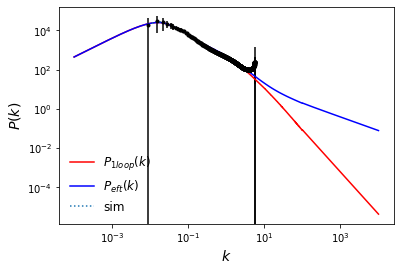

In [11]:
# Plot
plt.plot(ks,pe, 'r', label='$P_{1loop}(k)$')
# plt.plot(ks,pu, 'r--', label='linear')
plt.plot(ks,peft, 'b', label='$P_{eft}(k)$')
# plt.plot(ks,pueft, 'b--', label='$P_{Ueft}(k)$')


plt.loglog(k, p, ':', label='sim')
plt.errorbar(k, p, yerr=err, fmt=".k", capsize=0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$P(k)$', fontsize=14)
plt.legend(loc='lower left', fontsize=12, frameon=False)

In [9]:
from glob import glob
fnames = glob('/Users/c49734lf/Workspace/Datasets/Quijote_simulations/Pk/matter/fiducial_HR/*/Pk_m_z=0.txt')
arrays = [np.loadtxt(f, unpack=True) for f in fnames]
k, p = arrays[0]
pk = [arrays[i][1] for i in range(len(arrays))]
maximum = np.amax(pk, axis=0)
minimum = np.amin(pk, axis=0)
err = maximum - minimum
mean = np.mean(pk, axis=0)
var = np.var(pk, axis=0)
std = np.std(pk, axis=0)
k;
cov0 = np.zeros((886, 886), int)
np.fill_diagonal(cov0, var)
cov = cov0
k_array = np.array(k)
p_array = np.array(mean)
cov_array = var
p_int = interp1d( k, p, fill_value="extrapolate")
cov_int = interp1d( k, var, fill_value="extrapolate")